In [12]:
!pip install imageio

In [10]:
!pip install imageio[pyav]

     ---------------------------------------- 25.9/25.9 MB 4.5 MB/s eta 0:00:00


In [14]:
!pip install Pillow

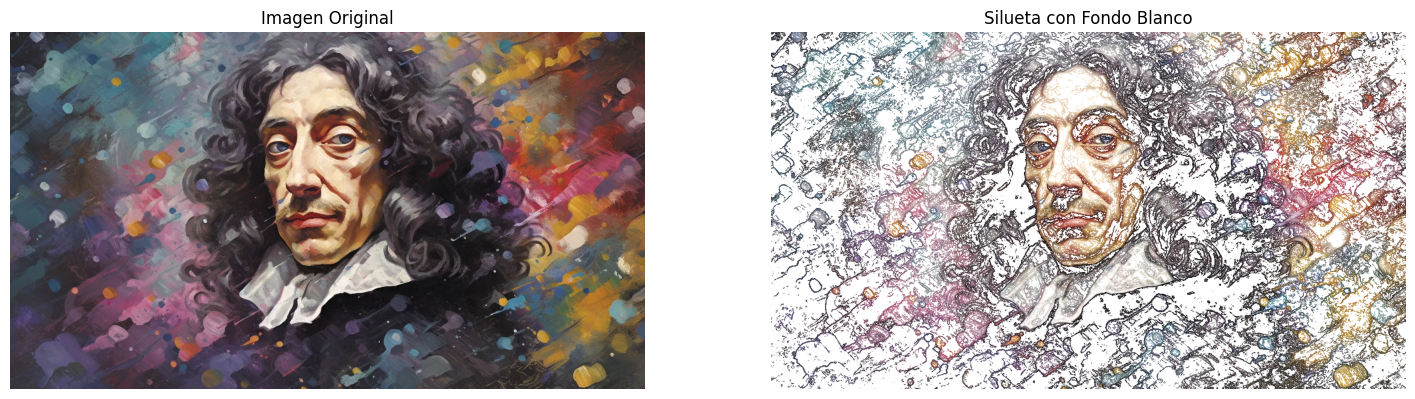

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import color, filters
from PIL import Image

def silhouette_with_white_inside_spinoza(image_path, save_path='silhouette_with_white_spinoza.png'):
    # Leer la imagen utilizando Pillow
    image = np.array(Image.open(image_path))

    # Convertir la imagen a escala de grises
    gray_image = color.rgb2gray(image)

    # Aplicar un filtro de bordes
    edges = filters.sobel(gray_image)

    # Binarizar la imagen para obtener la silueta
    silhouette1 = edges > 0.02  # Ajusta este umbral según sea necesario

    # Crear una imagen completamente blanca
    white_inside1 = np.ones_like(image) * 255

    # Copiar la silueta sobre el fondo blanco
    white_inside1[silhouette1] = image[silhouette1]

    # Guardar la silueta con fondo blanco como una imagen
    Image.fromarray(white_inside1.astype(np.uint8)).save(save_path)

    # Mostrar la imagen original y la silueta con fondo blanco
    plt.figure(figsize=(18, 9))

    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title('Imagen Original')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(white_inside1)
    plt.title('Silueta con Fondo Blanco')
    plt.axis('off')

    plt.show()

# Especifica la ruta de la imagen que deseas procesar
image_path = 'spinoza.jpg'  # Cambia 'tu_imagen.jpg' con la ruta de tu imagen

# Llama a la función para generar la silueta con fondo blanco y mostrarla
silhouette_with_white_inside_spinoza(image_path)

In [1]:
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [2]:
# recursos para NLTK
nltk.download( 'punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\villa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\villa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
def preprocess_text(text, words_to_remove=None):
    # Convertir a minúsculas
    text = text.lower()

    # Eliminar emojis
    text = re.sub(r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F'
                  r'\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F'
                  r'\U0001FA70-\U0001FAFF\U00002702-\U000027B0\U000024C2-\U0001F251]+', ' ', text)

    # Eliminar caracteres no alfabéticos y números
    text = re.sub(r'[^a-zA-Z]', ' ', text)

    # Tokenización
    words = nltk.word_tokenize(text)

    # Eliminar stopwords
    stop_words = set(stopwords.words('spanish'))  # Puedes cambiar 'english' por tu idioma
    words = [word for word in words if word not in stop_words]

    # Eliminar palabras personalizadas
    if words_to_remove:
        words = [word for word in words if word not in words_to_remove]

    # Unir palabras preprocesadas
    preprocessed_text = ' '.join(words)

    return preprocessed_text


In [17]:
## leer el archivo de texto
with open('spinoza.txt', 'r', encoding='utf-8') as file:
    raw_text = file.read()

In [18]:
#Lista de palabras a eliminar 
words_to_remove = ['g','d','sici', 'l','m','s','si','la', 'lo', 'le', 'que','en', 'se', 'de', 'el', 'los', 'las', 'un', 'con', 'en', 'n', 'una', 'su', 'son', 'por', 'para', 'del', 'nos', 'sobre', 'e', 'https', 'lnkd', 'este','esto', 'es', 'ni', 'sus', 'todo', 'sin', 'como']
## preprocesamiento
# Realiza el preprocesamiento con eliminación de palabras
processed_text = preprocess_text(raw_text, words_to_remove)
# Verifica el texto después del preprocesamiento
print("\nTexto después del preprocesamiento:")
print(processed_text)


Texto después del preprocesamiento:
causa entiendo aquello cuya esencia implica existencia aquello cuya naturaleza puede concebir sino existente llama finita nero aquella cosa puede ser limitada misma naturaleza ejemplo dice cuerpo finito siempre concebimos mayor as tambi pensamiento limitado pensamiento cuerpo limitado pensamiento pensamiento cuerpo sustancia entiendo aquello concibe decir aquello cuyo concepto necesita concepto cosa deba ser formado atributo entiendo aquello entendimiento percibe sustancia constitutivo esencia modo entiendo afecciones sustancia aquello medio dej tambi concebido dios entiendo ser absolutamente infinito decir sustancia consta infinitos atributos cada cuales expresa esencia eterna infinita explicaci digo absolutamente infinito nero aquello infinito nero podemos negar infinitos atributos cambio absolutamente infinito pertenece so esencia expresa esencia implica negaci alguna llamar libre aquella cosa existe sola necesidad naturaleza determina sola obrar

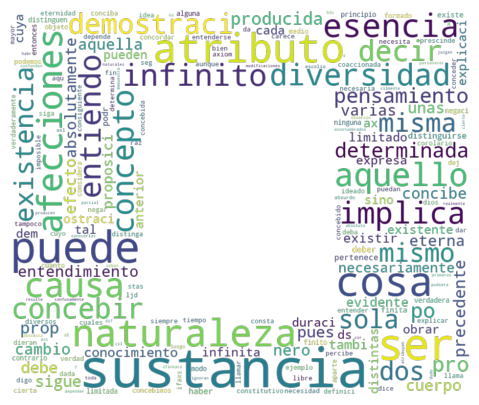

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Tu texto preprocesado
processed_text = processed_text

# Cargar la imagen que se usará como máscara y convertirla a escala de grises
mask_image = np.array(Image.open( "Dime, qué se siente haber leído un laudo más extenso al que te asignaron (14).png").convert('L'))  # Cambia 'tu_imagen.png' con la ruta de tu imagen

# Configurar el objeto WordCloud con la máscara y colores originales
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color=None, mode='RGBA',
                      colormap='viridis', collocations=False, mask=mask_image).generate(processed_text)

# Mostrar la nube de palabras
plt.figure(figsize=(15, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

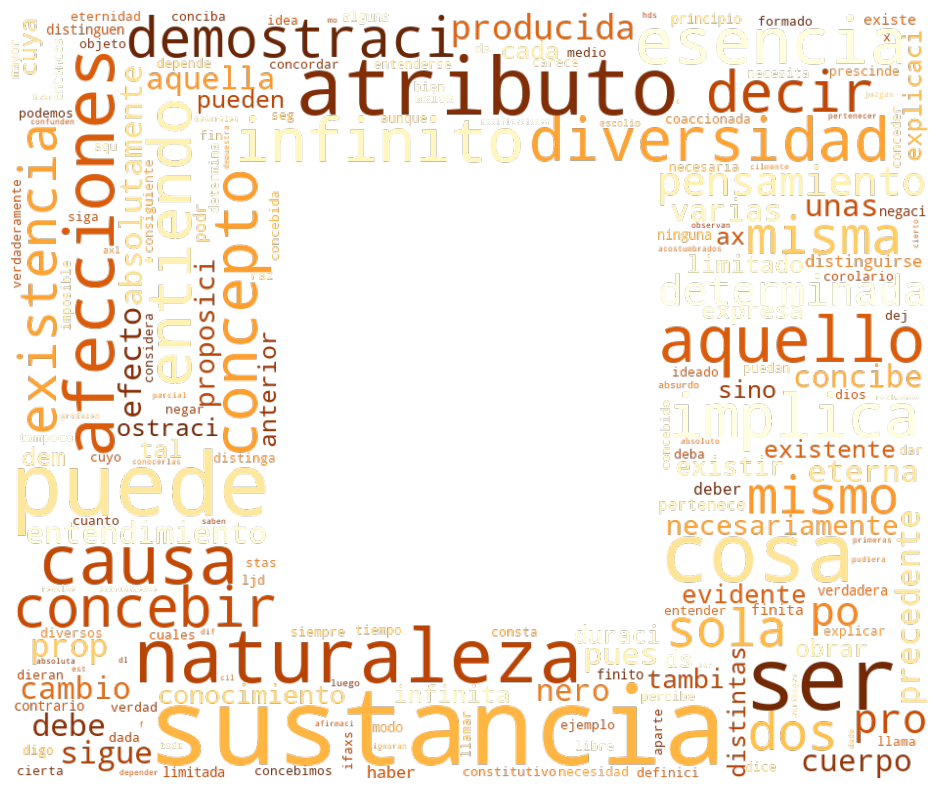

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Tu texto preprocesado
processed_text = processed_text

# Cargar la imagen que se usará como máscara y convertirla a escala de grises
mask_image = np.array(Image.open('Dime, qué se siente haber leído un laudo más extenso al que te asignaron (14).png' ).convert('L'))  

# Configurar el objeto WordCloud con la máscara y colores personalizados
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color=None, mode='RGBA',
                      colormap='YlOrBr', collocations=False, mask=mask_image).generate(processed_text)

# Mostrar la nube de palabras
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

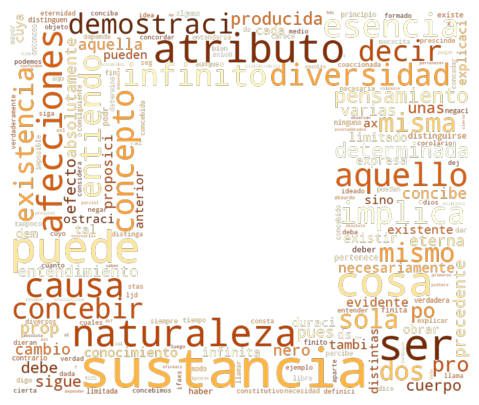

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Tu texto preprocesado
processed_text = processed_text 

# Cargar la imagen que se usará como máscara y convertirla a escala de grises
mask_image = np.array(Image.open('Dime, qué se siente haber leído un laudo más extenso al que te asignaron (14).png').convert('L'))

# Configurar el objeto WordCloud con la máscara y colores personalizados
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color=None, mode='RGBA',
                      colormap='gray', collocations=False, mask=mask_image, max_words=200).generate(processed_text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

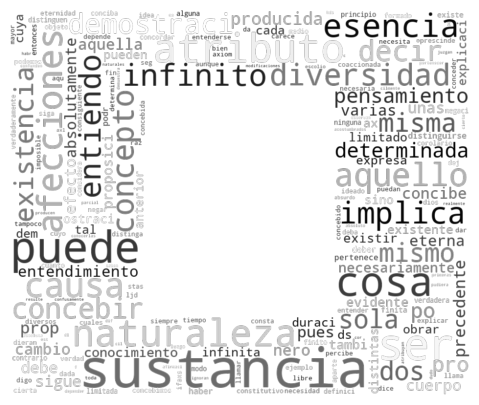

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Tu texto preprocesado
processed_text = processed_text 

# Cargar la imagen que se usará como máscara y convertirla a escala de grises
mask_image = np.array(Image.open('Dime, qué se siente haber leído un laudo más extenso al que te asignaron (14).png').convert('L'))

# Configurar el objeto WordCloud con la máscara y colores personalizados
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color=None, mode='RGBA',
                      colormap='gray', collocations=False, mask=mask_image, max_words=200).generate(processed_text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()